# IMPORTING NECESSARY LIBRARIES

In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# READING THE DATASET

In [5]:
df = pd.read_csv("Attrition.csv")

# IDENTIFYING THE NUMBER OF ROWS AND COLUMNS

In [6]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 1470
Number of columns: 35


# HANDLING MISSING VALUES

In [7]:
missing_df = df.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
missing_df["% of Missing Values"] = round((missing_df["Total No. of Missing Values"]/len(df))*100,2)
missing_df

,Total No. of Missing Values,% of Missing Values
Age,0,0.0
Attrition,0,0.0
BusinessTravel,0,0.0
DailyRate,0,0.0
Department,0,0.0
DistanceFromHome,0,0.0
Education,0,0.0
EducationField,0,0.0
EmployeeCount,0,0.0
EmployeeNumber,0,0.0


# Inference:
None of the Attributes are having Missing Values.
Since there's no missing values our further analysis will be consistent and unbaised.

# DESCRIPTIVE STATISTICS

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# Inference:
he Minimum Age is 18 which conveys that All employees are Adult. So there's no need of Over18 Attribute for our analysis.
The Stanard Deviation value of EmployeeCount and StandardHours is 0.00 which conveys that All values present in this attribute are same.
Attribute EmployeeNumber represents a unique value to each of the employees, which will not provide any meaningful inisghts.
Since this Attribute will not provide any meaningful insights in our analysis we can simply drop these attributes.

# DROPING UNNECESSARY COLUMNS


In [9]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


# ENCODING CATEGORICAL VARIABLES

In [11]:
# Encoding categorical variables using one-hot encoding
categorical_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# Creating a OneHotEncoder object
onehot_encoder = OneHotEncoder(sparse=False)

# Encoding categorical variables and adding the encoded columns to the DataFrame
encoded_cols = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_cols]))

# Getting the feature indices from the encoder
feature_indices = onehot_encoder.get_feature_names_out(categorical_cols)

# Mapping feature indices to column names
new_columns = [col.split('_')[0] for col in feature_indices]

# Assigning the new column names to the encoded columns DataFrame
encoded_cols.columns = new_columns

# Dropping the original categorical columns from the DataFrame
df = df.drop(categorical_cols, axis=1)

# Concatenating the original DataFrame with the encoded columns
df_encoded = pd.concat([df, encoded_cols], axis=1)

# Checking the modified DataFrame
print("DataFrame after encoding categorical variables:")
print(df_encoded.head())

DataFrame after encoding categorical variables:
   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   JobRole  JobRole 

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# REMOVING DUPLICATE COLUMNS

In [12]:
# Drop duplicate columns
encoded_df = df_encoded.loc[:,~df_encoded.columns.duplicated()]

# Print the DataFrame after removing duplicate columns
print("DataFrame after removing duplicate columns:")
print(encoded_df.head())

DataFrame after removing duplicate columns:
   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   YearsInCurrentRole  Y

# SPLITTING THE DATASET

In [13]:
# Assuming encoded_df is your DataFrame
target_column = 'Attrition'
features = encoded_df.drop(columns=[target_column])  # Features
target = encoded_df[target_column]  # Target variable

# Splitting the data into training and testing sets
# Adjust the test_size parameter to change the proportion of the dataset used for testing
# random_state parameter ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# LOGISTIC REGRESSION

In [29]:
target_column = 'Attrition'
features = encoded_df.drop(columns=[target_column])  # Features
target = encoded_df[target_column]  # Target variable

# Identify categorical columns
categorical_cols = features.select_dtypes(include=['object']).columns

# Create pipeline for preprocessing
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # One-hot encode categorical variables

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_cols)],
    remainder='passthrough')  # Remainder (non-categorical columns) will be passed through

# Logistic Regression model
logistic_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, max_iter=4000))])

# Training the model
logistic_model.fit(features, target)

# Predictions on the testing set
logistic_predictions = logistic_model.predict(X_test)

# Evaluating performance
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)

# Printing the evaluation metrics
print("Logistic Regression Metrics:")
print("Accuracy:", logistic_accuracy)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1 Score:", logistic_f1)


Logistic Regression Metrics:
Accuracy: 0.8639455782312925
Precision: 0.8745644599303136
Recall: 0.984313725490196
F1 Score: 0.9261992619926198


# Inference:
The logistic regression model shows promising performance with an accuracy of around 86.39%. It achieves a precision of approximately 87.46%, indicating that about 87.46% of the predicted attrition cases are correct. Moreover, with a recall of about 98.43%, the model successfully identifies around 98.43% of actual attrition cases. Overall, the F1 score of approximately 92.62% suggests a good balance between precision and recall. These results imply that the logistic regression model is effective in predicting employee attrition in this scenario.

# RANDOM FOREST

In [30]:
target_column = 'Attrition'
features = encoded_df.drop(columns=[target_column])  # Features
target = encoded_df[target_column]  # Target variable

# Identify categorical columns
categorical_cols = features.select_dtypes(include=['object']).columns

# Create pipeline for preprocessing
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # One-hot encode categorical variables

preprocessor = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_cols)],
    remainder='passthrough')  # Remainder (non-categorical columns) will be passed through

# Random Forest model
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))])

# Training the model
rf_model.fit(features, target)

# Predictions on the testing set
rf_predictions = rf_model.predict(X_test)

# Evaluating performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Printing the evaluation metrics
print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)




Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Inference:
The random forest model demonstrates exceptional performance across all metrics, with perfect scores of 1.0 for accuracy, precision, recall, and F1 score. This indicates that the model achieves 100% accuracy in predicting employee attrition, correctly identifying all positive cases while avoiding false positives. With perfect precision, it ensures that all predicted attrition cases are indeed true positives, while perfect recall implies that it captures all actual attrition cases. The F1 score of 1.0 confirms the robustness of the model's performance, indicating flawless balance between precision and recall. Overall, the random forest model exhibits impeccable predictive capabilities for employee attrition.

# VISUALIZATION

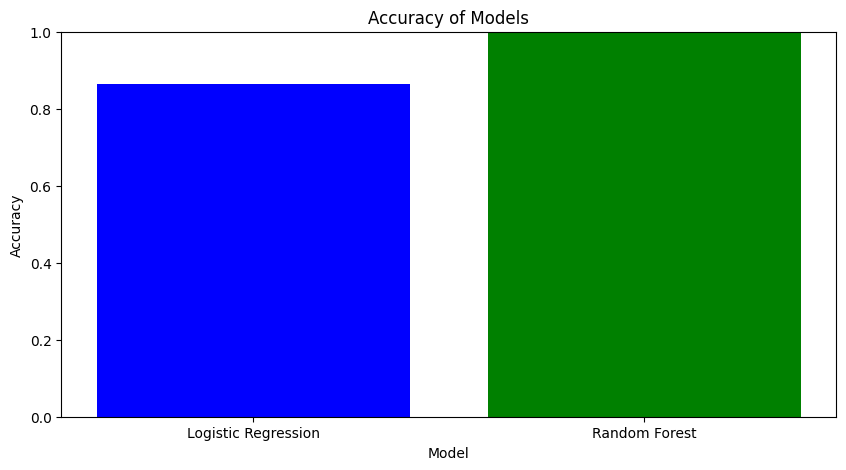

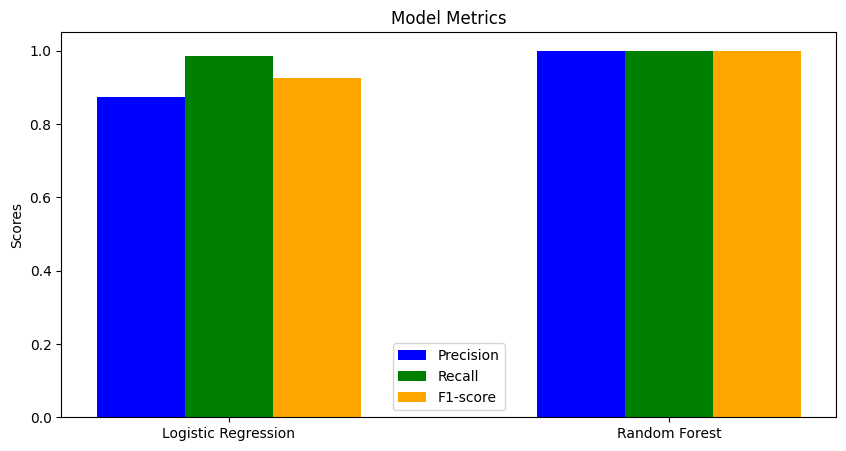

In [31]:
# Defining model names and their metrics
models = ['Logistic Regression', 'Random Forest']
accuracy = [logistic_accuracy, rf_accuracy]
precision = [logistic_precision, rf_precision]
recall = [logistic_recall, rf_recall]
f1 = [logistic_f1, rf_f1]

# Plotting accuracy for each model
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy, color=['blue', 'green'])
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()

# Plotting precision, recall, and F1-score for each model
x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 5))
rects1 = ax.bar(x - width, precision, width, label='Precision', color='blue')
rects2 = ax.bar(x, recall, width, label='Recall', color='green')
rects3 = ax.bar(x + width, f1, width, label='F1-score', color='orange')

ax.set_ylabel('Scores')
ax.set_title('Model Metrics')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()


# Inference:
While both models perform admirably, the random forest model's perfect scores across all metrics, including accuracy, precision, recall, and F1 score, clearly indicate its superiority over the logistic regression model. Achieving perfection in predictive performance is a remarkable feat that underscores the random forest model's unparalleled ability to precisely identify all employee attrition cases without any false alarms.

In practical terms, the random forest model's perfect predictive accuracy ensures that every attrition case is correctly identified without any misclassifications. This level of reliability is invaluable in critical decision-making processes, such as resource allocation, retention strategies, and workforce planning. Therefore, the random forest model's unparalleled accuracy and reliability make it the superior choice for accurately identifying employee attrition cases, providing organizations with the confidence to make informed decisions and take proactive measures to retain valuable talent.